In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install imblearn

In [3]:
from imblearn.over_sampling import SMOTE                  # SMOTE - Synthetic Minority Oversampling Technique
from imblearn.datasets import make_imbalance

In [4]:
from sklearn.datasets import load_iris

In [5]:
iris_data = load_iris()
X = iris_data.data
y = iris_data.target

In [6]:
X_imbalanced , y_imbalanced = make_imbalance(X, y,
                                            sampling_strategy = { 
                                                0:10,
                                                1:20, 
                                                2:30}
                                            )

In [7]:
np.unique(y_imbalanced, return_counts = True)

(array([0, 1, 2]), array([10, 20, 30], dtype=int64))

# Oversampling data when datasets are imbalanced

In [8]:
smote = SMOTE()

In [9]:
X_imbalanced , y_imbalanced = smote.fit_resample(X_imbalanced , y_imbalanced)

In [10]:
np.unique(y_imbalanced, return_counts = True)

(array([0, 1, 2]), array([30, 30, 30], dtype=int64))

# Classification

In [11]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [12]:
data = pd.read_csv('../dataset/Social_Network_Ads.csv')
data.sample(7)

,User ID,Gender,Age,EstimatedSalary,Purchased
22,15714658,Male,48,41000,1
302,15720745,Female,37,137000,1
187,15571059,Female,33,41000,0
213,15657163,Male,35,58000,0
312,15733964,Female,38,50000,0
40,15764419,Female,27,17000,0
225,15622171,Male,37,53000,0


In [13]:
data.drop(['User ID'], axis = 1, inplace = True)

<AxesSubplot:xlabel='Gender', ylabel='count'>

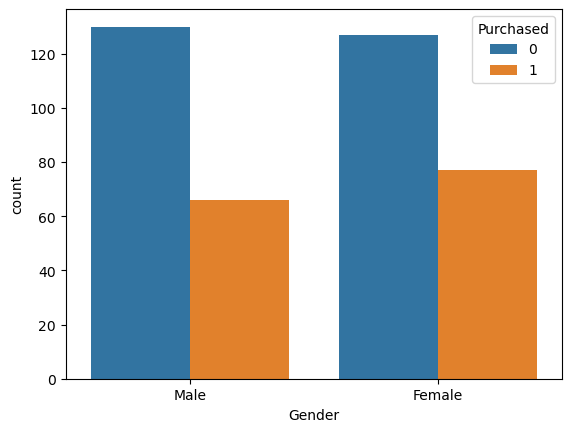

In [14]:
sns.countplot(data = data , x = 'Gender' , hue = 'Purchased')

In [15]:
data.drop('Gender', axis = 1, inplace = True)

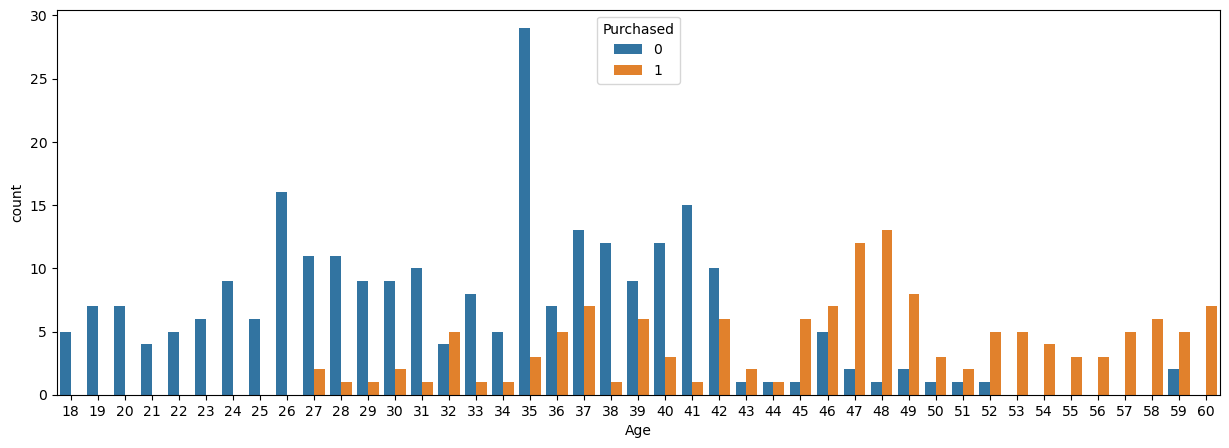

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(data = data , x = 'Age' , hue = 'Purchased')
plt.show()

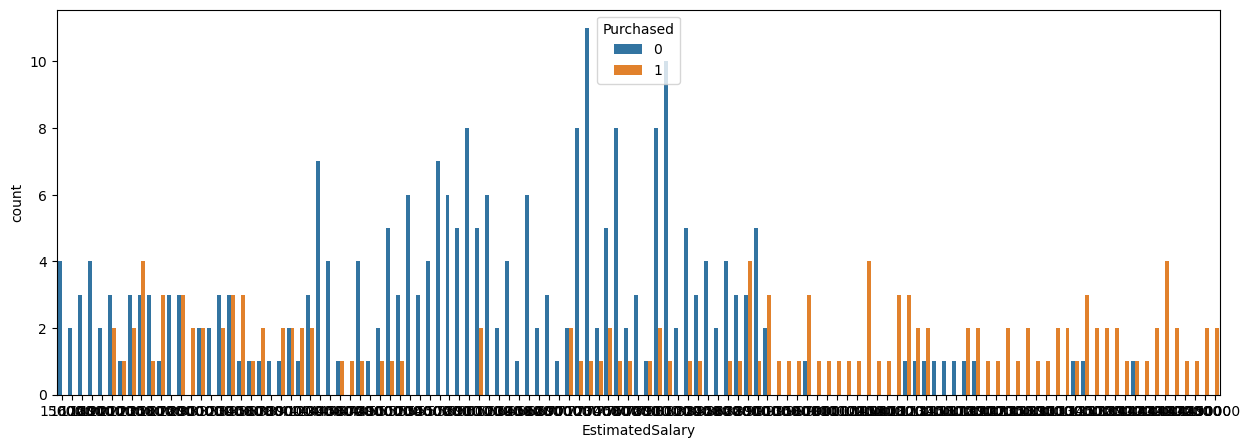

In [17]:
plt.figure(figsize=(15,5))
sns.countplot(data = data , x = 'EstimatedSalary' , hue = 'Purchased')

plt.show()

In [18]:
data.shape

(400, 3)

In [19]:
y = data['Purchased']
X = data[['Age','EstimatedSalary']]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y , 
                                                    test_size= 0.2, random_state= 666,
                                                   stratify= y)

# Standard Scaling Transformation

In [21]:
scaler = StandardScaler()

In [22]:
X_train = scaler.fit_transform(X_train)

# logistic_regression

In [23]:
logistic_regression = LogisticRegression()

In [24]:
logistic_regression.fit(X_train , y_train)

LogisticRegression()

In [25]:
X_test = scaler.transform(X_test)

In [28]:
y_predict = logistic_regression.predict(X_test)

In [29]:
y_predict_proba = logistic_regression.predict_proba(X_test)

In [30]:
y_predict[:5]

array([1, 1, 1, 1, 0], dtype=int64)

In [31]:
y_predict_proba[:5]

array([[0.07306775, 0.92693225],
       [0.17813774, 0.82186226],
       [0.09407089, 0.90592911],
       [0.32974948, 0.67025052],
       [0.57049322, 0.42950678]])

In [32]:
np.unique(y, return_counts= True)

(array([0, 1], dtype=int64), array([257, 143], dtype=int64))

# sklearn.metrics

In [34]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

In [35]:
accuracy_score(y_test , y_predict)

0.875

In [36]:
print(classification_report(y_test , y_predict))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91        51
           1       0.88      0.76      0.81        29

    accuracy                           0.88        80
   macro avg       0.88      0.85      0.86        80
weighted avg       0.88      0.88      0.87        80



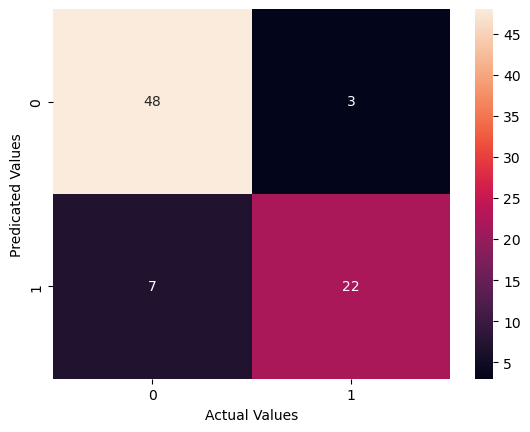

In [37]:
sns.heatmap(confusion_matrix(y_test , y_predict), annot = True)
plt.xlabel('Actual Values')
plt.ylabel('Predicated Values')
plt.show()

# New Datasets

In [38]:
data =pd.read_csv('../dataset/dataset_bank.csv')
data.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7179,7180,15575438,Pease,613,France,Male,42,7,115076.06,1,1,1,79323.61,0
9373,9374,15807457,Abernathy,641,Spain,Female,36,1,0.00,2,1,0,102021.39,0
7585,7586,15580579,Trevisani,490,France,Female,40,1,0.00,1,1,1,49594.19,1
4076,4077,15676404,Kirillov,672,France,Female,50,1,0.00,1,1,0,12106.82,1
3566,3567,15741875,Williamson,746,Spain,Female,25,3,104833.79,1,0,0,71911.30,0
7053,7054,15815271,Ritchie,755,Germany,Male,43,6,165048.50,3,1,0,16929.41,1
2528,2529,15654106,K?,604,France,Male,26,8,149542.52,2,0,1,197911.52,0
8512,8513,15716420,Kelly,612,Spain,Male,39,5,170288.38,1,1,1,59601.15,0
4269,4270,15580252,Waters,748,France,Male,44,4,112610.77,1,0,1,2048.55,0
2885,2886,15716024,Dennis,660,Spain,Male,42,5,0.00,2,1,0,115509.59,0


In [39]:
col_to_drop = ['RowNumber','CustomerId','Surname']
data.drop(col_to_drop, axis = 1, inplace = True)

In [40]:
data.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


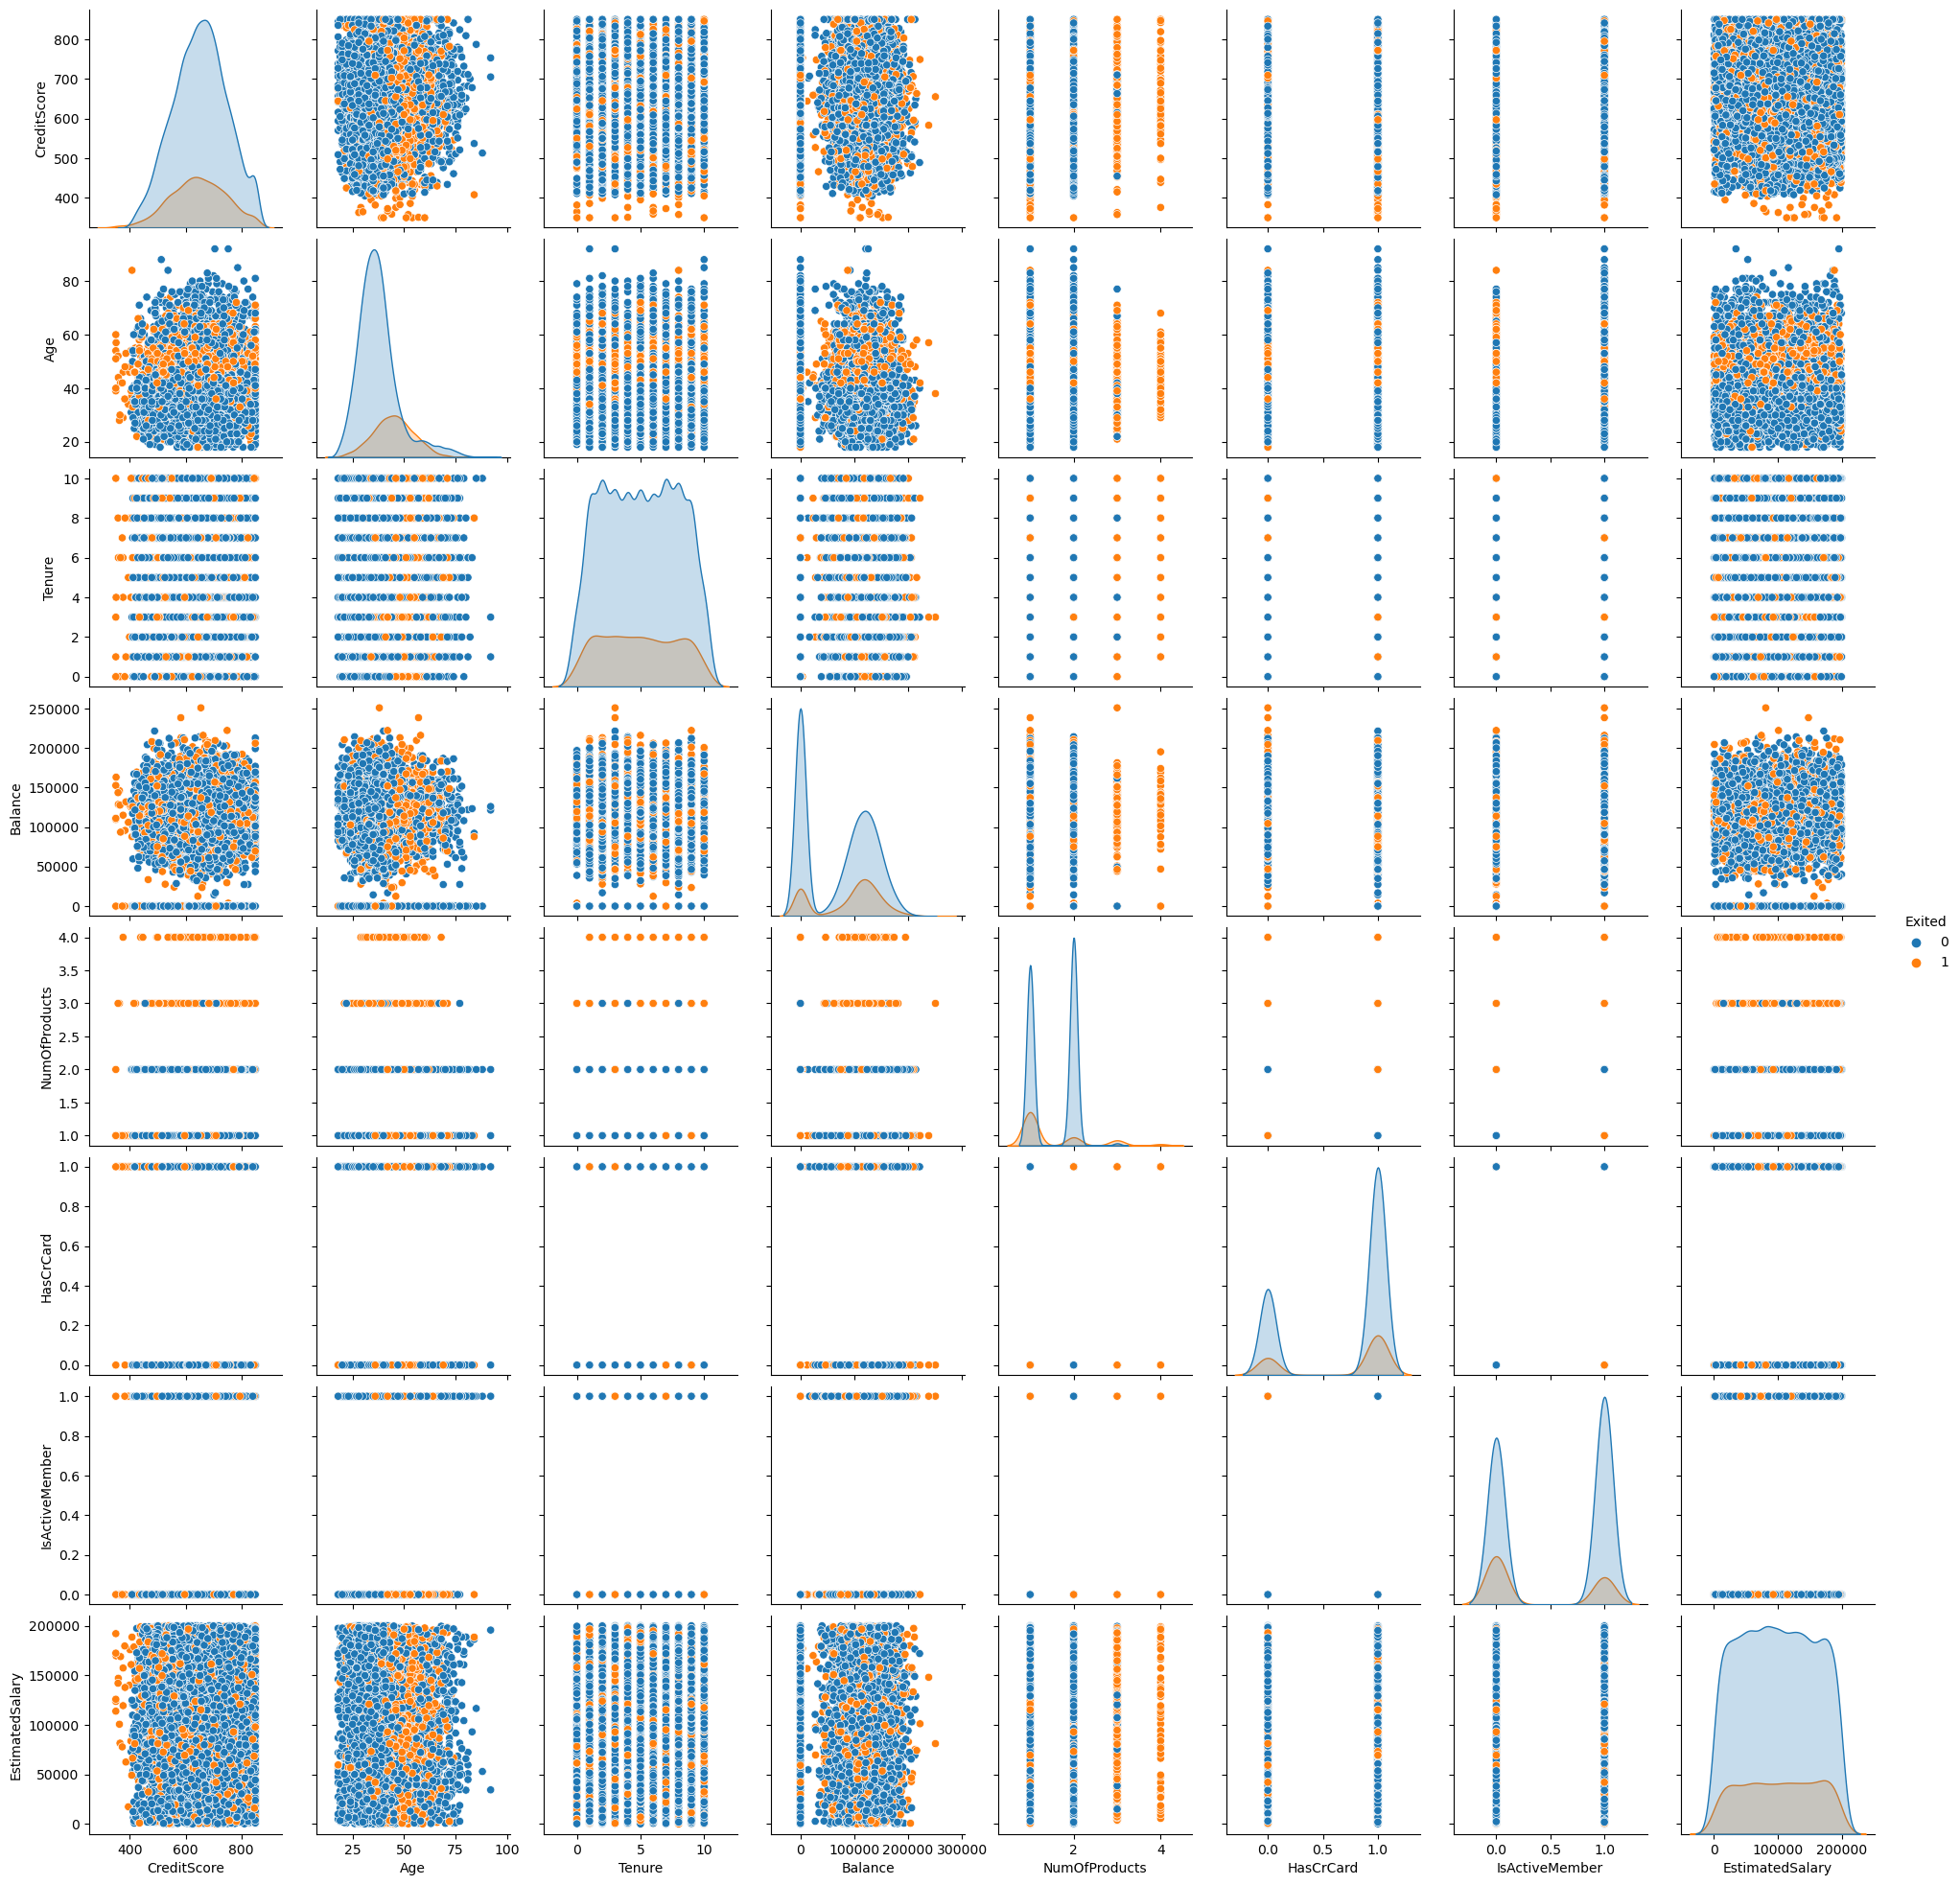

In [41]:
sns.pairplot(data, hue ='Exited')
plt.show()